In [ ]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Task
Handle missing values in the dataframe.

## Identify missing values

### Subtask:
Determine which columns have missing values and the count of missing values in each column.


**Reasoning**:
Determine which columns have missing values and the count of missing values in each column by using the isnull and sum methods.



In [ ]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## Visualize missing values

### Subtask:
Create a visualization to better understand the distribution of missing values across the dataset.


**Reasoning**:
Generate a matrix plot to visualize the distribution of missing values across the DataFrame.



<Axes: >

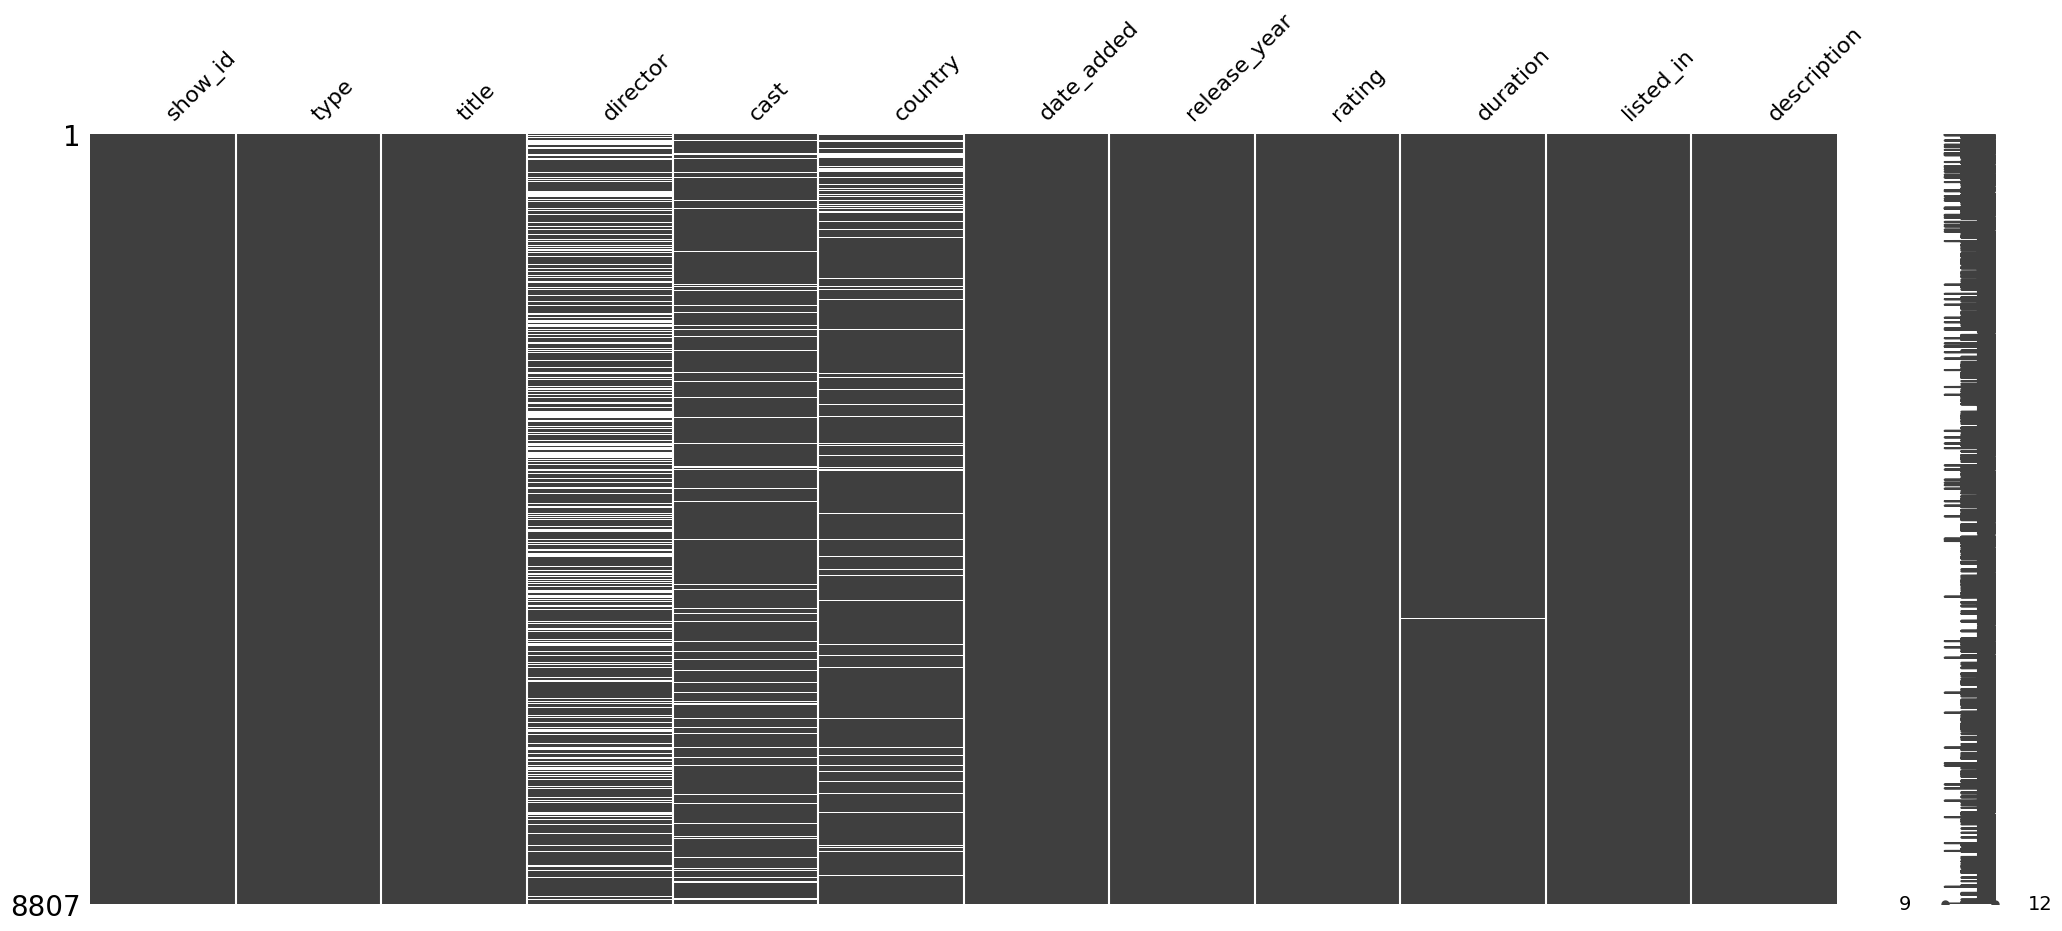

In [ ]:
import missingno as msno

msno.matrix(df)


## Handle missing values

### Subtask:
Address missing values using appropriate techniques such as filling with a placeholder, mean, median, or mode, or dropping rows/columns with missing values.


**Reasoning**:
Fill missing values in specified columns and drop rows with missing values in other specified columns.



In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


/tmp/ipython-input-1139142136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1139142136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## Verify handling

### Subtask:
Check again for missing values to confirm they have been handled as intended.


**Reasoning**:
Use the isnull().sum() method to verify that the missing values have been handled as intended, and print the results.



In [ ]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8802,False
8803,False
8804,False
8805,False


In [ ]:
# tampilkan hanya baris duplikat
duplikat = df[df.duplicated()]
print("\nBaris duplikat:")
print(duplikat)


Baris duplikat:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


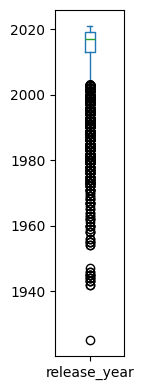

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind="box", subplots=True, layout=(1, len(df.columns)), figsize=(12,4))
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


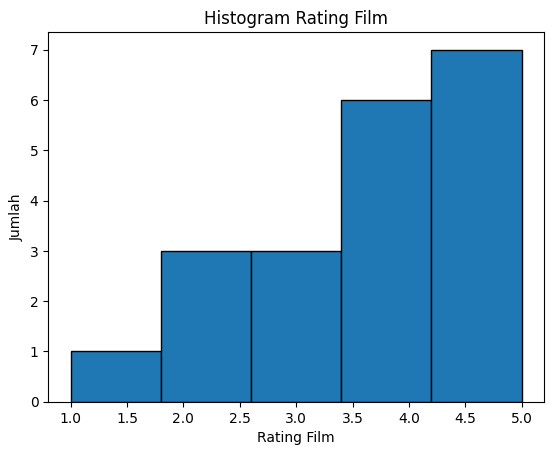

In [ ]:
import matplotlib.pyplot as plt

# contoh data rating film
rating = [5, 4, 4, 3, 5, 2, 5, 4, 3, 4, 5, 1, 2, 4, 5, 5, 3, 2, 4, 5]

plt.hist(rating, bins=5, edgecolor='black')  # bins=5 karena rating 1–5
plt.xlabel("Rating Film")
plt.ylabel("Jumlah")
plt.title("Histogram Rating Film")
plt.show()


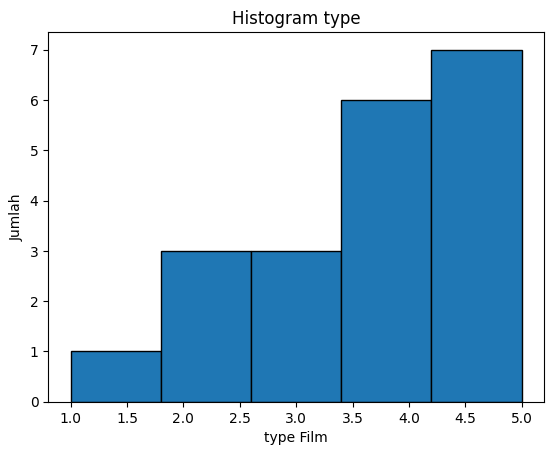

In [ ]:
import matplotlib.pyplot as plt

# contoh data rating film
type = [5, 4, 4, 3, 5, 2, 5, 4, 3, 4, 5, 1, 2, 4, 5, 5, 3, 2, 4, 5]

plt.hist(rating, bins=5, edgecolor='black')  # bins=5 karena rating 1–5
plt.xlabel("type Film")
plt.ylabel("Jumlah")
plt.title("Histogram type")
plt.show()


Jumlah tiap type:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64


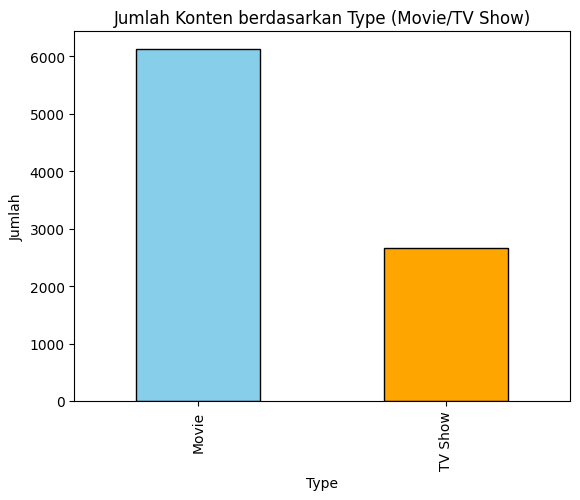

In [ ]:
type_counts = df['type'].value_counts()
print("\nJumlah tiap type:")
print(type_counts)

# Visualisasi dengan bar chart
type_counts.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Jumlah Konten berdasarkan Type (Movie/TV Show)")
plt.xlabel("Type")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# tampilkan distribusi dengan menyertakan NaN
print(df['type'].value_counts(dropna=False))

# distribusi persentase termasuk NaN
print(df['type'].value_counts(dropna=False, normalize=True) * 100)


type
Movie      6126
TV Show    2664
Name: count, dtype: int64
type
Movie      69.692833
TV Show    30.307167
Name: proportion, dtype: float64


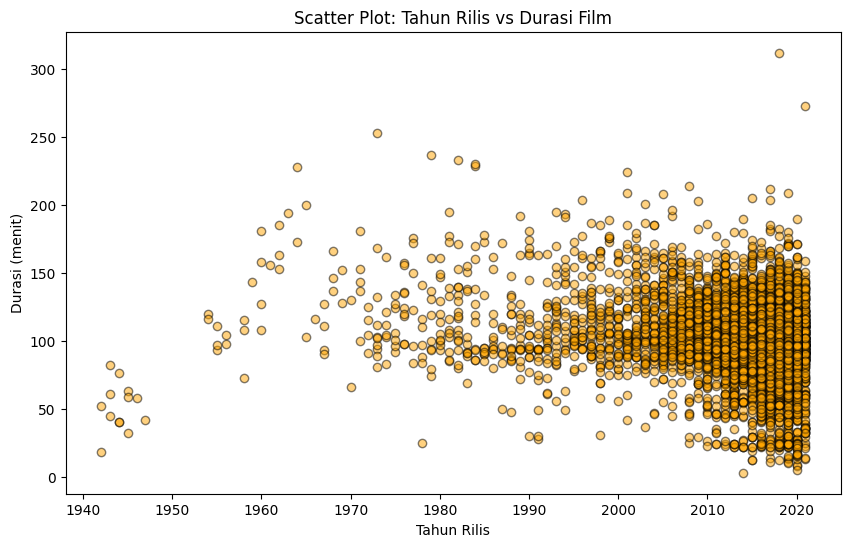

In [ ]:
# ambil hanya Movie
movies = df = pd.read_csv("netflix.csv")
movies = movies[movies['type']=="Movie"].dropna(subset=['duration','release_year'])

# ekstrak angka menit dari duration
movies['duration_min'] = movies['duration'].str.replace(" min","").astype(int)

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(movies['release_year'], movies['duration_min'], alpha=0.5, color="orange", edgecolor="black")

plt.title("Scatter Plot: Tahun Rilis vs Durasi Film")
plt.xlabel("Tahun Rilis")
plt.ylabel("Durasi (menit)")
plt.show()


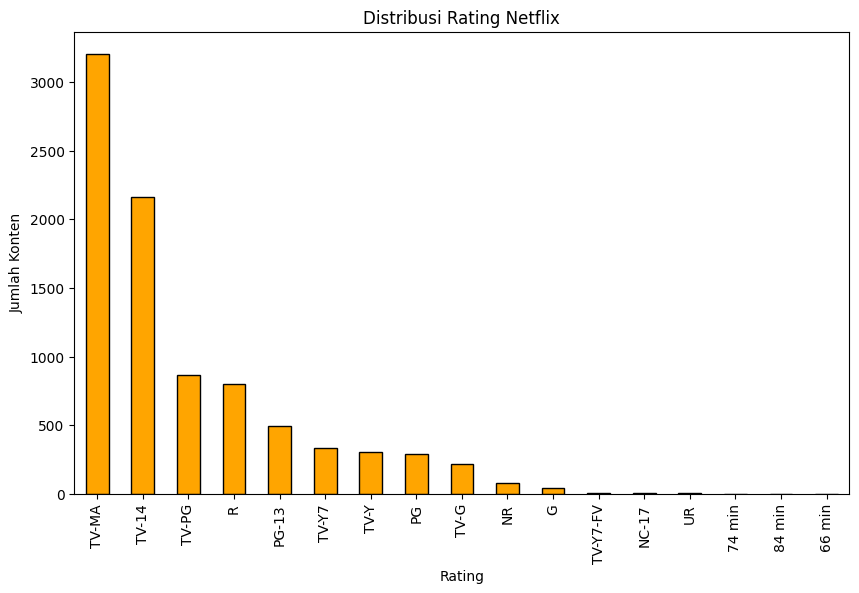

In [ ]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().plot(kind="bar", color="orange", edgecolor="black")

plt.title("Distribusi Rating Netflix")
plt.xlabel("Rating")
plt.ylabel("Jumlah Konten")
plt.show()


In [ ]:
# Asumsi data sudah dibersihkan
df = pd.read_csv("netflix_titles.csv")

# Pilih beberapa fitur yang relevan
X = df[['release_year', 'rating', 'duration', 'country', 'listed_in']]
y = df['type']  # Target: Movie atau TV Show


In [ ]:
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col].astype(str))

y = le.fit_transform(y)


/tmp/ipython-input-3521806404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/tmp/ipython-input-3521806404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/tmp/ipython-input-3521806404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


## Summary:

### Data Analysis Key Findings

*   Initially, the dataset had missing values in several columns: `director` (2634), `cast` (825), `country` (831), `date_added` (10), `rating` (4), and `duration` (3).
*   Missing values in the `director`, `cast`, and `country` columns were filled with the placeholder 'Unknown'.
*   Rows with missing values in the `date_added`, `rating`, and `duration` columns were removed from the dataset.
*   After handling, the dataset has no remaining missing values in any column.

### Insights or Next Steps

*   Consider the implications of filling versus dropping missing values on the overall dataset size and the potential bias introduced.
*   Explore alternative imputation strategies for numerical columns if dropping rows is not desired for future analyses.


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Example fuzzy logic system
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['quality'] = 6
tipping.input['service'] = 9
tipping.compute()
tipping.output['tip']